In [9]:
from google.colab import files
import pandas as pd
import numpy as np

Загрузка данных

In [ ]:
url = 'https://raw.githubusercontent.com/varantseva/MLbase_2021_spring/main/lecture02/Homework/Problem1/weatherAUS.csv'
df = pd.read_csv(url)
df.isna().sum()

Предобработка: удаление стоблцов в которых более 50000 значений отсудствуют, удаление строк с нулевыми значениями (иначе далее не выполняется кодировка строчных значений), замена названий столбцов, так как они загружаются с лишними проблеми из внешнего файла.

In [ ]:
df_name_columns = ['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am','Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'] 
df.set_axis(df_name_columns, axis = 'columns', inplace = True)
df.drop(columns=["Date", "Evaporation", "Sunshine", "Cloud9am", "Cloud3pm"], inplace = True)
df.dropna(inplace = True)
df

Щифрование строчных значений в численные 

In [12]:
from sklearn import preprocessing

labelencoder = preprocessing.LabelEncoder()
df['Location'] = labelencoder.fit_transform(df['Location'])
df['WindGustDir'] = labelencoder.fit_transform(df['WindGustDir'])
df['WindDir9am'] = labelencoder.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = labelencoder.fit_transform(df['WindDir3pm'])
df['RainToday'] = labelencoder.fit_transform(df['RainToday'])
df['RainTomorrow'] = labelencoder.fit_transform(df['RainTomorrow'])

Разделение данных на тренировочные и тестовые

In [13]:
from sklearn.model_selection import train_test_split

y = pd.Series(df['RainTomorrow']) 
x = pd.DataFrame(data = df.loc[:'RainToday'], columns = df.columns[:-2])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.75)

Наивный Баес 

In [14]:
%time
from sklearn.metrics import classification_report
from sklearn.naive_bayes import  GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

print (np.mean(prediction == y_test))

print(classification_report(y_test, prediction))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs
0.823092544926441
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     65983
           1       0.63      0.49      0.55     18711

    accuracy                           0.82     84694
   macro avg       0.75      0.70      0.72     84694
weighted avg       0.81      0.82      0.82     84694



Определение оптимального k для метода ближайших соседей

In [ ]:
%%time

from sklearn.neighbors import KNeighborsClassifier

n_nb = range(1, 30)
res = []

for i in n_nb: 
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)

    prediction = neigh.predict(X_test)

    res.append((np.mean(prediction == y_test)))

In [ ]:
import matplotlib.pyplot as plt

plt.plot(n_nb, res)
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.title("Score on KNeighborsClassifier")
plt.show()

Метод ближайших соседей (k=16)

In [16]:
%%time

neigh = KNeighborsClassifier(n_neighbors=16)
neigh.fit(X_train, y_train)

prediction = neigh.predict(X_test)
print (np.mean(prediction == y_test))

print(classification_report(y_test, prediction))

0.8483953999102651
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     65983
           1       0.77      0.44      0.56     18711

    accuracy                           0.85     84694
   macro avg       0.82      0.70      0.74     84694
weighted avg       0.84      0.85      0.83     84694

CPU times: user 29.3 s, sys: 43.8 ms, total: 29.3 s
Wall time: 29.2 s


**Логистическая Регрессия**


In [17]:
%time

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(penalty =  'l2', max_iter = 5000)
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.58 µs


In [18]:
import numpy as np

print (np.mean(prediction == y_test))

0.8470729921836258


In [19]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test, prediction))

[[62598  3385]
 [ 9567  9144]]


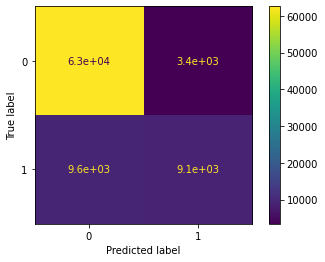

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier, X_test, y_test) 
plt.show()

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     65983
           1       0.73      0.49      0.59     18711

    accuracy                           0.85     84694
   macro avg       0.80      0.72      0.75     84694
weighted avg       0.84      0.85      0.84     84694



Сравнение метрик и времени моделей:

1.   Время 
    
*   наивный баес: 8.82 µs
*   ближайшие соседи(k=16): 29.2 s
*   логистическая регрессия 8.58 µs

2.   Среднее откронение 
*   наивный баес: 0.823
*   ближайшие соседи(k=16): 0.848
*   логистическая регрессия 0.847



